# Pymaceuticals Inc.
---

### Analysis

- This mock trial consisted of 248 mice afflicted with squamous cell carcinoma (SCC) tumor growths, 9 potential drug treatments and 1 control placebo treatment. Over the course of 45 days, each mouse was given one of the 10 treatments and measurements the tumor volume were recorded on every 5th day. This study includes a statistical summary table, visual representations of different characteristics of the study, and a correlation and regression analysis of the average weight of the mice against the average tumor volume. 
- The statistics summary table was created by isolating the 130 mice that completed the entire 45 day study, then subtracting the tumor volume recorded on the first day of the study from the tumor volume recorded on the 45th day in order to capture the change in volume. Statistical analysis was then conducted by grouping the data by drug regimen and calculating the mean, median, variance, standard deviation, and SEM for each drug regimen. This method revealed two treatments, Capomulin and Ramicane, that showed potential as treatments for SCC due to the -8.72 and -10.04 average change in tumor volume, respectfully. The other 7 seven treatments showed a positive change in tumor volume similar to that of the placebo control. 
- The correlation and regression analysis showed a strong correlation between the average weight of the mouse and the average volume of the tumor with a correlation coefficient of 0.84. 


In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame

mouse_study = pd.merge(mouse_metadata, study_results, how="left", on = "Mouse ID")

# Display the data table for preview
mouse_study.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
mouse_study = mouse_study[['Mouse ID', 'Timepoint', 'Drug Regimen', 'Tumor Volume (mm3)', 'Sex', 'Age_months', 'Weight (g)', 'Metastatic Sites']]
mouse_study

,Mouse ID,Timepoint,Drug Regimen,Tumor Volume (mm3),Sex,Age_months,Weight (g),Metastatic Sites
0,k403,0,Ramicane,45.000000,Male,21,16,0
1,k403,5,Ramicane,38.825898,Male,21,16,0
2,k403,10,Ramicane,35.014271,Male,21,16,1
3,k403,15,Ramicane,34.223992,Male,21,16,1
4,k403,20,Ramicane,32.997729,Male,21,16,1
...,...,...,...,...,...,...,...,...
1888,z969,25,Naftisol,63.145652,Male,9,30,2
1889,z969,30,Naftisol,65.841013,Male,9,30,3
1890,z969,35,Naftisol,69.176246,Male,9,30,4
1891,z969,40,Naftisol,70.314904,Male,9,30,4


In [3]:
# Checking the number of mice.
mouse_metadata["Mouse ID"].count()

249

In [24]:
len(mouse_metadata["Drug Regimen"].unique())

10

In [5]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate = mouse_study[mouse_study[["Mouse ID", "Timepoint"]].duplicated() == True]
duplicate

,Mouse ID,Timepoint,Drug Regimen,Tumor Volume (mm3),Sex,Age_months,Weight (g),Metastatic Sites
909,g989,0,Propriva,45.000000,Female,21,26,0
911,g989,5,Propriva,47.570392,Female,21,26,0
913,g989,10,Propriva,49.880528,Female,21,26,0
915,g989,15,Propriva,53.442020,Female,21,26,0
917,g989,20,Propriva,54.657650,Female,21,26,1


In [6]:
dup_mouse = duplicate['Mouse ID'].unique()
dup_mouse

array(['g989'], dtype=object)

In [7]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_mouse = mouse_study[mouse_study['Mouse ID'].isin(dup_mouse)==False]
clean_mouse.head()

,Mouse ID,Timepoint,Drug Regimen,Tumor Volume (mm3),Sex,Age_months,Weight (g),Metastatic Sites
0,k403,0,Ramicane,45.000000,Male,21,16,0
1,k403,5,Ramicane,38.825898,Male,21,16,0
2,k403,10,Ramicane,35.014271,Male,21,16,1
3,k403,15,Ramicane,34.223992,Male,21,16,1
4,k403,20,Ramicane,32.997729,Male,21,16,1


In [8]:
# Checking the number of mice in the clean DataFrame.
len(clean_mouse["Mouse ID"].unique())

248

## Summary Statistics

In [9]:
# Instead of using all of the data, this code will find the change in volume of the tumor by sutracting the final volume
# from the initial volume.
# Find initial volume
initial_vol = clean_mouse.loc[clean_mouse['Timepoint'] == 0]
# find final volume
final_vol = clean_mouse.loc[clean_mouse['Timepoint'] == 45]

# Some mice do not have the full 45 days of measurements, so they will not be included in the summary table 
# in order to maintain consistancy.
# Merge the two dataframes to only include mice with the full 45 days of tumor volume measurements.
merged_vol = pd.merge(initial_vol, final_vol, on="Mouse ID", how="inner")
# Reduce the columes to only include relevent information and rename columes for clairity.
merged_vol = merged_vol[['Mouse ID', 'Drug Regimen_x', 'Tumor Volume (mm3)_x', 'Tumor Volume (mm3)_y']]
renamed_merged_vol = merged_vol.rename(columns={'Drug Regimen_x': 'Drug Regimen', 'Tumor Volume (mm3)_x': 'Initial Volume (mm3)',
                           'Tumor Volume (mm3)_y': 'Final Volume (mm3)'})


renamed_merged_vol['Change in Volume'] = renamed_merged_vol['Final Volume (mm3)'] - renamed_merged_vol['Initial Volume (mm3)']
renamed_merged_vol.head()

,Mouse ID,Drug Regimen,Initial Volume (mm3),Final Volume (mm3),Change in Volume
0,k403,Ramicane,45.0,22.050126,-22.949874
1,s185,Capomulin,45.0,23.343598,-21.656402
2,x401,Capomulin,45.0,28.484033,-16.515967
3,m601,Capomulin,45.0,28.430964,-16.569036
4,g791,Ramicane,45.0,29.128472,-15.871528


In [25]:
len(renamed_merged_vol["Mouse ID"].unique())

130

In [10]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods
mean = renamed_merged_vol.groupby("Drug Regimen")["Change in Volume"].mean()
median = renamed_merged_vol.groupby("Drug Regimen")["Change in Volume"]. median()
vol_variance = renamed_merged_vol.groupby("Drug Regimen")["Change in Volume"].var()
vol_std_dev = renamed_merged_vol.groupby("Drug Regimen")["Change in Volume"].std()
sems = renamed_merged_vol.groupby("Drug Regimen")["Change in Volume"].sem()


# Assemble the resulting series into a single summary DataFrame.
summary_table = pd.DataFrame({"Average Change in Tumor Volume":mean,
                              "Median Change in Tumor Volume":median,
                              "Variance":vol_variance,
                              "Standard Deviation":vol_std_dev,
                              "Standard Error":sems})

summary_table

,Average Change in Tumor Volume,Median Change in Tumor Volume,Variance,Standard Deviation,Standard Error
Drug Regimen,,,,,
Capomulin,-8.763886,-7.688154,31.460537,5.608969,1.223977
Ceftamin,19.132421,19.299830,10.585242,3.253497,0.902358
Infubinol,20.755562,21.083066,11.787426,3.433282,1.144427
Ketapril,25.662958,24.872251,23.229260,4.819674,1.453186
Naftisol,24.265506,24.563621,26.079104,5.106770,1.416363
Placebo,23.084082,24.042841,20.098783,4.483167,1.351726
Propriva,21.258529,19.957562,24.967290,4.996728,1.888586
Ramicane,-10.044405,-10.151373,30.101010,5.486439,1.226805
Stelasyn,23.438310,24.299149,27.340818,5.228845,1.576556


## Bar and Pie Charts

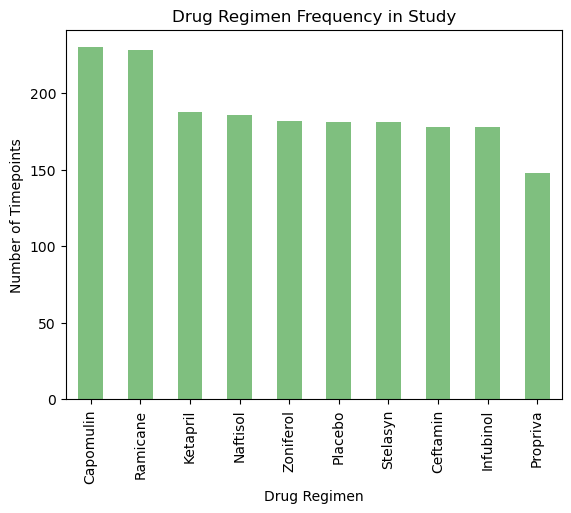

In [26]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.

drug_group = clean_mouse.groupby("Drug Regimen")
drug_count = drug_group["Drug Regimen"].count().sort_values(ascending=False)
drug_count.plot(kind="bar", ylabel= "Number of Timepoints", color='green', alpha=0.5, title='Drug Regimen Frequency in Study')
plt.show()

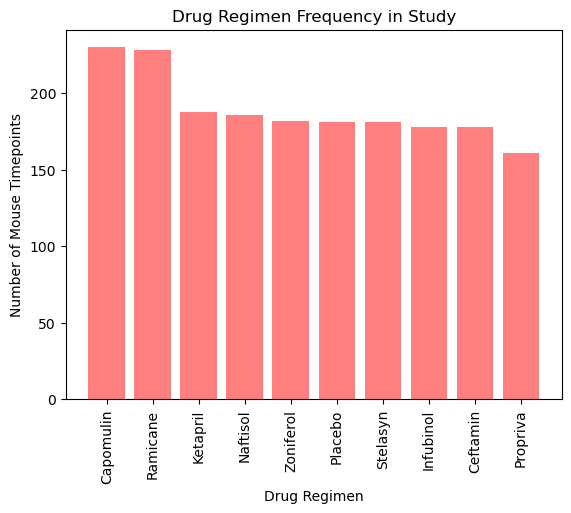

In [12]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
fig, ax = plt.subplots()

drugs = ['Capomulin', 'Ramicane', 'Ketapril', 'Naftisol', 'Zoniferol', 'Placebo','Stelasyn', 'Infubinol', 'Ceftamin',
        'Propriva']
counts = [230, 228, 188, 186, 182, 181, 181, 178, 178, 161]
ax.bar(drugs, counts, color='red', alpha=.5)
ax.set_ylabel('Number of Mouse Timepoints')
ax.set_xlabel('Drug Regimen')
ax.set_title('Drug Regimen Frequency in Study')
plt.xticks(rotation='vertical')
plt.show()

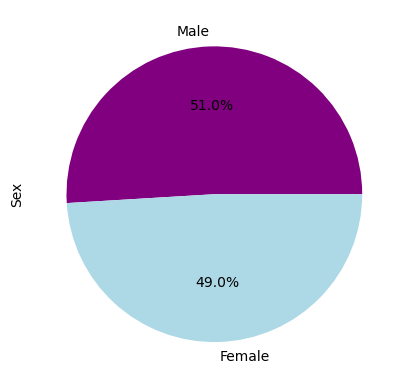

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
#.plot
labels = ["Male", "Female"]
sex = clean_mouse["Sex"].value_counts()
colors = ["purple", "lightblue"]

sex.plot(kind='pie', autopct='%.1f%%', colors=colors, labels=labels, ylabel='Sex')
plt.show()

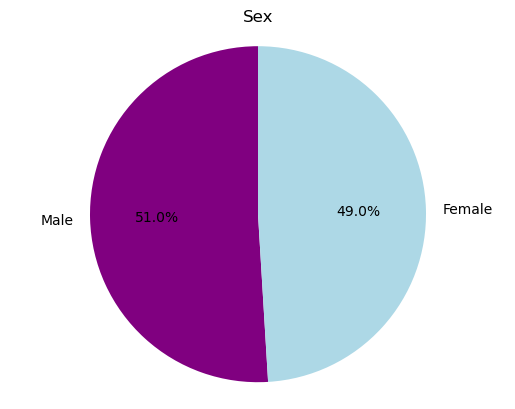

In [14]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
#plt.pie
labels = ["Male", "Female"]
sizes = clean_mouse["Sex"].value_counts()
colors = ["purple", "lightblue"]

plt.pie(sizes, labels=labels, colors=colors, autopct="%1.1f%%", startangle=90)
plt.axis("equal")
plt.title("Sex")
plt.show()

## Quartiles, Outliers and Boxplots

In [15]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
max_timepoint = clean_mouse.groupby(["Mouse ID"])["Timepoint"].max()
max_timepoint = max_timepoint.reset_index()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
merged_timepoint = max_timepoint.merge(clean_mouse, on=['Mouse ID', 'Timepoint'], how="left")
merged_timepoint

,Mouse ID,Timepoint,Drug Regimen,Tumor Volume (mm3),Sex,Age_months,Weight (g),Metastatic Sites
0,a203,45,Infubinol,67.973419,Female,20,23,2
1,a251,45,Infubinol,65.525743,Female,21,25,1
2,a262,45,Placebo,70.717621,Female,17,29,4
3,a275,45,Ceftamin,62.999356,Female,20,28,3
4,a366,30,Stelasyn,63.440686,Female,16,29,1
...,...,...,...,...,...,...,...,...
243,z435,10,Propriva,48.710661,Female,12,26,0
244,z578,45,Ramicane,30.638696,Male,11,16,0
245,z581,45,Infubinol,62.754451,Female,24,25,3
246,z795,45,Naftisol,65.741070,Female,13,29,3


In [16]:
# Put treatments into a list for for loop (and later for plot labels)
treatments =['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_volumes = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

for drug in treatments:
    # Locate the rows which contain mice on each drug and get the tumor volumes
    max_timepoint_volume = merged_timepoint.loc[merged_timepoint["Drug Regimen"]==drug, "Tumor Volume (mm3)"]
    
    # add subset 
    tumor_volumes.append(max_timepoint_volume)
    
    # Determine outliers using upper and lower bounds
    quartiles = max_timepoint_volume.quantile([.25, .5, .75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq
    
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    
    outliers = max_timepoint_volume.loc[(max_timepoint_volume < lower_bound) | (max_timepoint_volume > upper_bound)]
    print(f"{drug}'s potential outliers are: {outliers}")

# trying to print a message for if no outliers are found instead of what is currently printed

Capomulin's potential outliers are: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers are: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers are: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers are: Series([], Name: Tumor Volume (mm3), dtype: float64)


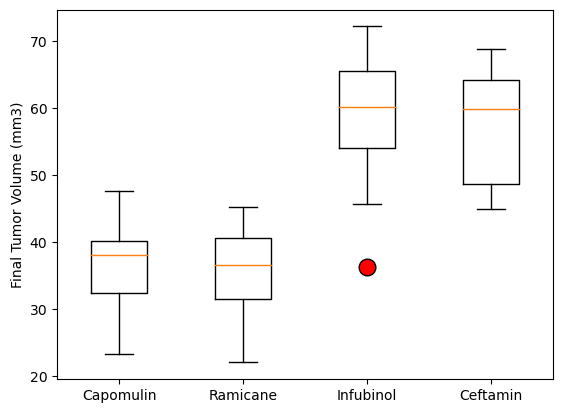

In [17]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
mark_outlier_red = dict(markerfacecolor='r', markersize=12)
plt.boxplot(tumor_volumes, labels=treatments, flierprops=mark_outlier_red)
plt.ylabel('Final Tumor Volume (mm3)')
plt.show()

## Line and Scatter Plots

In [18]:
# capturing capomulin entiries and putting them in a table
capomulin_table = clean_mouse.loc[clean_mouse['Drug Regimen'] == 'Capomulin']
# capturing mouse id s185 to plot
chosen_mouse = capomulin_table.loc[capomulin_table['Mouse ID'] == 's185']
chosen_mouse
#capomulin_table

,Mouse ID,Timepoint,Drug Regimen,Tumor Volume (mm3),Sex,Age_months,Weight (g),Metastatic Sites
10,s185,0,Capomulin,45.000000,Female,3,17,0
11,s185,5,Capomulin,43.878496,Female,3,17,0
12,s185,10,Capomulin,37.614948,Female,3,17,0
13,s185,15,Capomulin,38.177232,Female,3,17,0
14,s185,20,Capomulin,36.866876,Female,3,17,0
15,s185,25,Capomulin,33.949940,Female,3,17,0
16,s185,30,Capomulin,32.959671,Female,3,17,1
17,s185,35,Capomulin,28.328531,Female,3,17,1
18,s185,40,Capomulin,25.472143,Female,3,17,1
19,s185,45,Capomulin,23.343598,Female,3,17,1


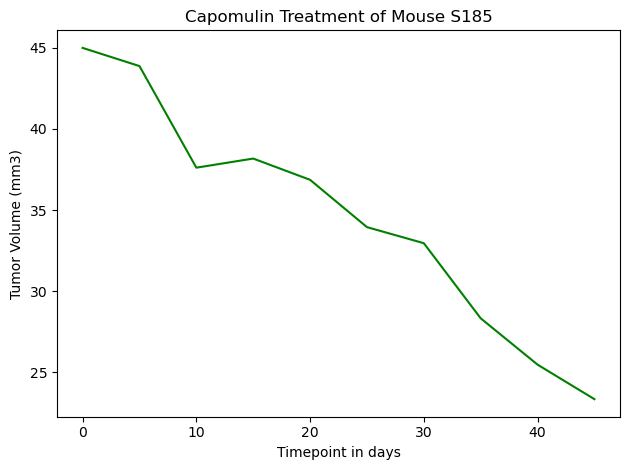

In [19]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
plt.plot(chosen_mouse['Timepoint'], chosen_mouse['Tumor Volume (mm3)'], color='green')
plt.xlabel('Timepoint in days')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Capomulin Treatment of Mouse S185')
plt.tight_layout()
plt.show()

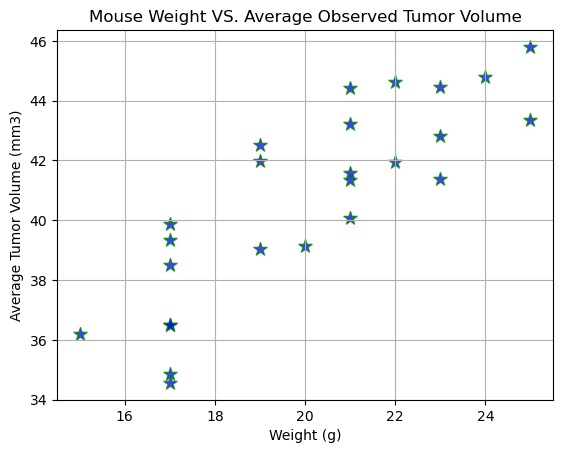

In [20]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capomulin_table = clean_mouse.loc[clean_mouse['Drug Regimen'] == 'Capomulin']
grouped_capomulin = capomulin_table.groupby(["Mouse ID"])
mean_weight = grouped_capomulin["Weight (g)"].mean()
mean_volume = grouped_capomulin["Tumor Volume (mm3)"].mean()
plt.scatter(mean_weight, mean_volume, marker='*', facecolors='blue', edgecolors='green', alpha=.75, s=100)
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title('Mouse Weight VS. Average Observed Tumor Volume')
plt.grid()
plt.show()

## Correlation and Regression

The correlation between mouse weight and average tumor volume: 0.84


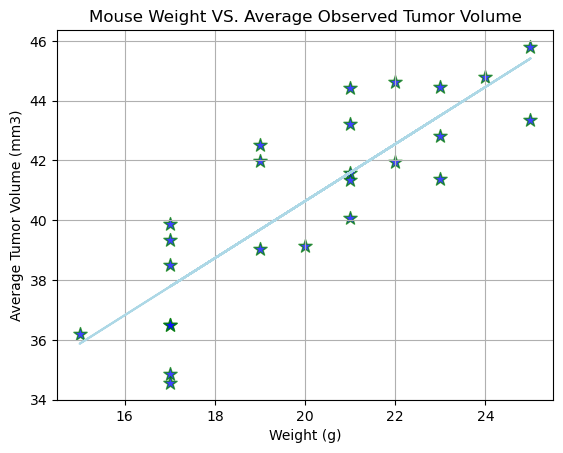

In [21]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
correlation = round(st.pearsonr(mean_weight, mean_volume)[0],2)
print(f"The correlation between mouse weight and average tumor volume: {correlation}")

model = st.linregress(mean_weight, mean_volume)
y_values = mean_weight*model[0]+model[1]

plt.scatter(mean_weight, mean_volume, marker='*', facecolors='blue', edgecolors='green', alpha=.75, s=100)
plt.plot(mean_weight, y_values, color='lightblue')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title('Mouse Weight VS. Average Observed Tumor Volume')
plt.grid()
plt.show()